In [1]:
# -*- coding: utf-8 -*-
#https://blog.csdn.net/m0_37228052/article/details/128481161?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_baidulandingword~default-0-128481161-blog-111279591.pc_relevant_multi_platform_whitelistv3&spm=1001.2101.3001.4242.1&utm_relevant_index=3
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
#import contextily as ctx
from pylab import figure, scatter, show
import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline
from math import cos
import seaborn as sns
import cartopy.crs as ccrs
from esda.moran import Moran,Moran_BV

import geoplot as gplt
import geoplot.crs as gcrs
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math
from matplotlib.patches import Ellipse,Circle
from splot.esda import plot_moran,plot_moran_bv_simulation

In [2]:
def find_lsoa(point):
    for name, polygon in zip(df_map['LSOA11CD'], df_map['geometry']):
        if point.within(polygon):
            return name
    return ''

In [4]:
year = 2020 
scattergdf = gpd.read_file(f'../result/data/osm_poi_data_selected/{year}/greater-london-{year}-free-selected.shp')
scattergdf = scattergdf.to_crs(crs='OSGB36 / British National Grid + ODN height') #经纬度转笛卡尔坐标系
#scattergdf
df_map = gpd.read_file('../data/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp', crs='ESRI:54004')

In [8]:
scattergdf['LSOA'] = scattergdf['geometry'].apply(find_lsoa)
scattergdf.to_file(f'../result/data/{year}_poi_LSOA.shp',
          driver='ESRI Shapefile',
          encoding='utf-8')

In [9]:
scattergdf = gpd.read_file(f'../result/data/{year}_poi_LSOA.shp')
scattergdf

,osm_id,code,fclass,name,class,LSOA,geometry
0,20849687,2303,cafe,None,2.0,E01003889,POINT (515967.301 169339.234)
1,25475389,2303,cafe,Woburn Cafe,2.0,E01000943,POINT (529872.043 182516.376)
2,25497832,2303,cafe,Cafe Angel,2.0,E01000936,POINT (530788.556 182337.753)
3,25696354,2303,cafe,Crazy Horse Cafe,2.0,E01001745,POINT (533579.505 185455.618)
4,25991205,2303,cafe,Jack's Cafe,2.0,E01033699,POINT (533738.781 185323.442)
...,...,...,...,...,...,...,...
13841,6457582585,2504,mall,None,1.0,E01004067,POINT (534164.339 176712.156)
13842,6498189131,2504,mall,Hadson Mall,1.0,E01033604,POINT (526776.955 182034.149)
13843,3753647145,2306,food_court,Ethos,2.0,E01033595,POINT (529217.767 181360.614)
13844,5718576951,2306,food_court,None,2.0,E01003573,POINT (540913.615 184231.717)


/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/libpysal/weights/util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])
/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/splot/_viz_esda_mpl.py:355: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)
/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/libpysal/weights/util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])
/Users/xiuyu/opt/anaconda3/envs/tianyi/li

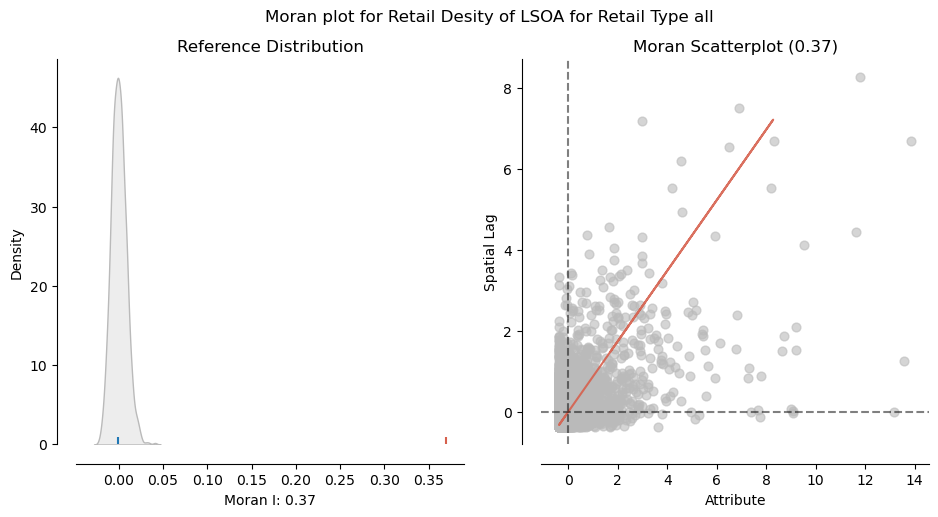

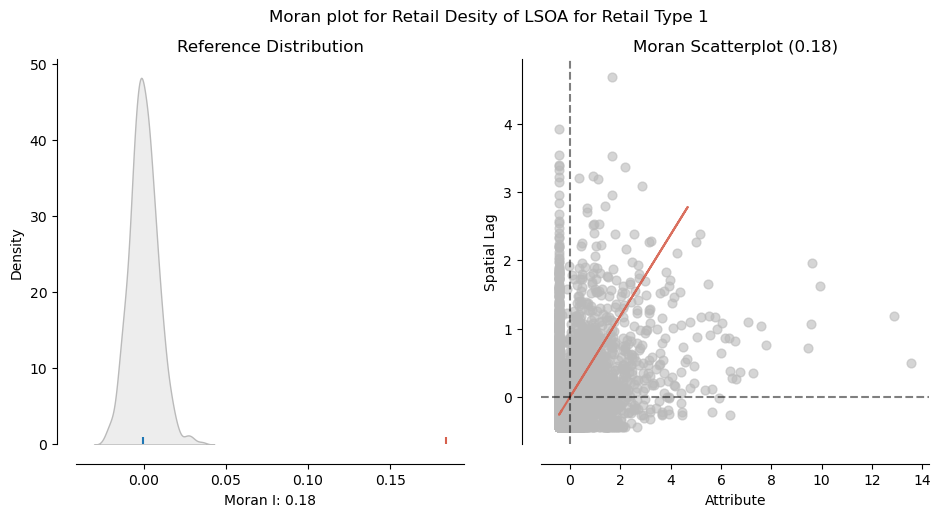

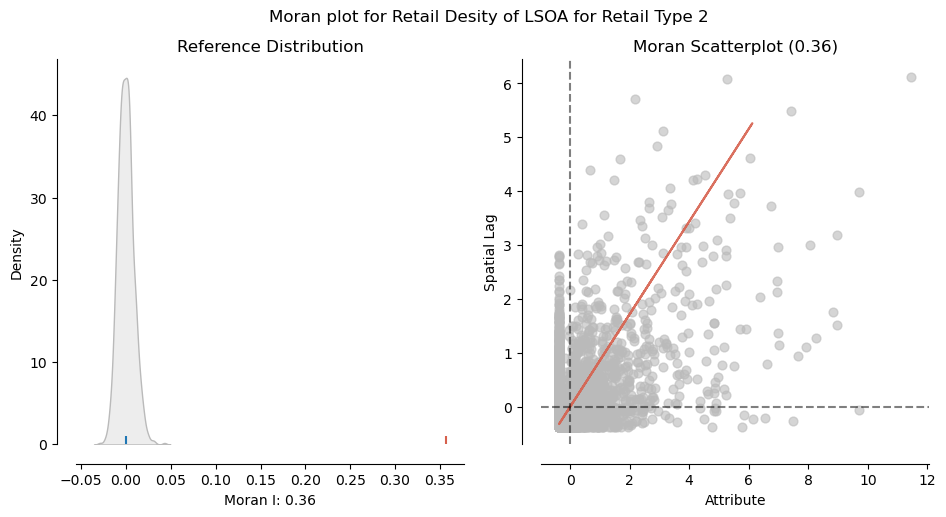

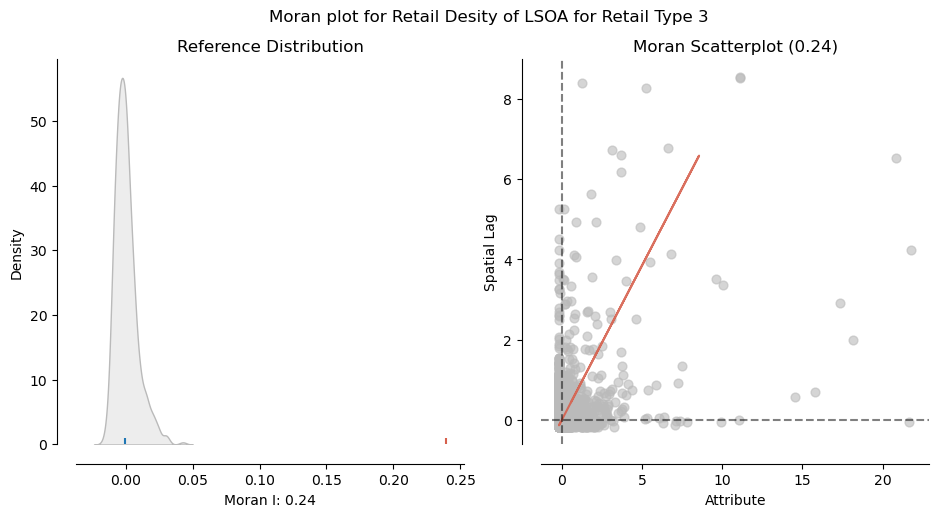

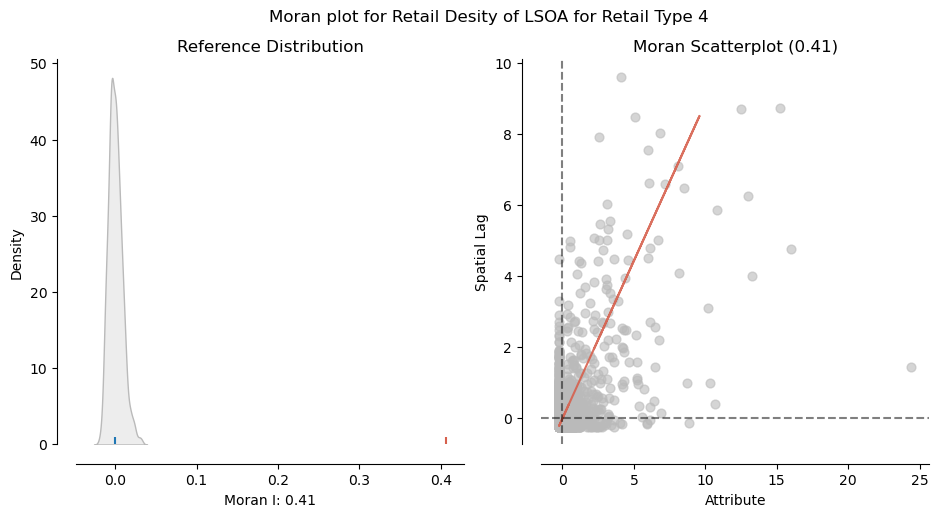

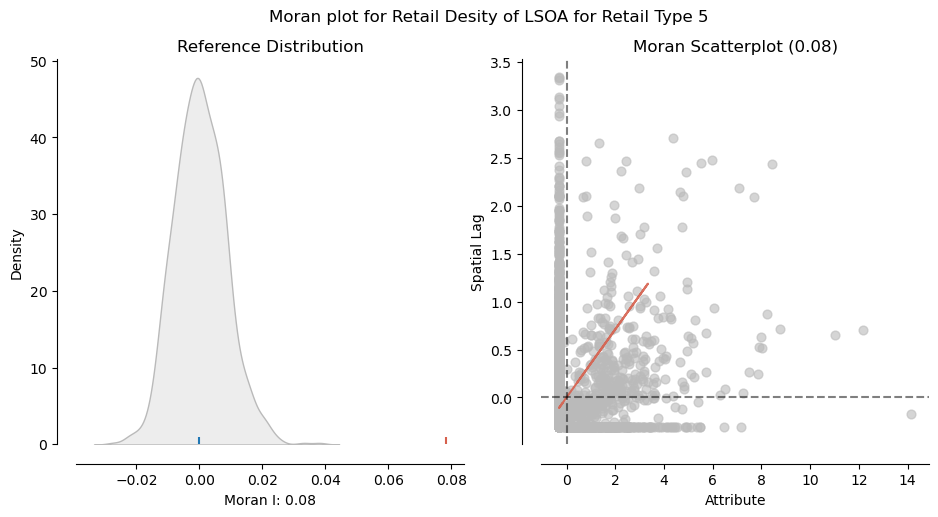

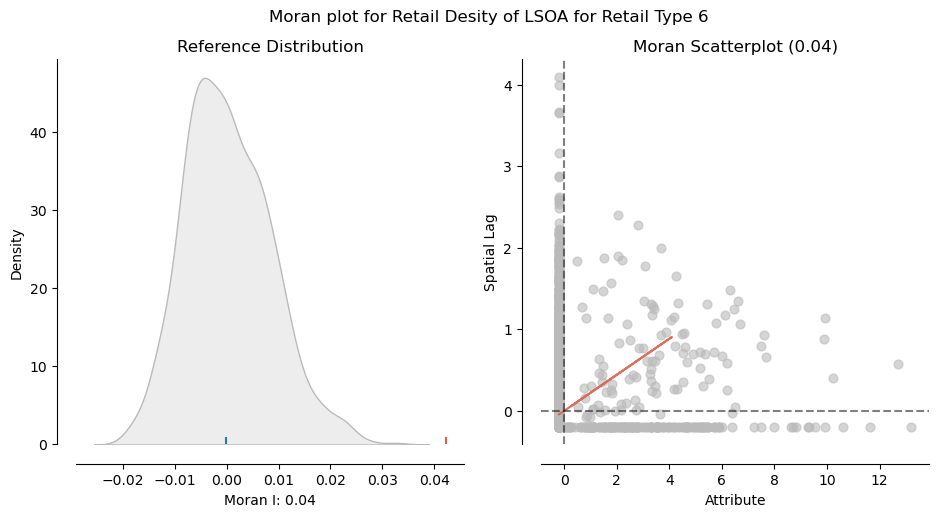

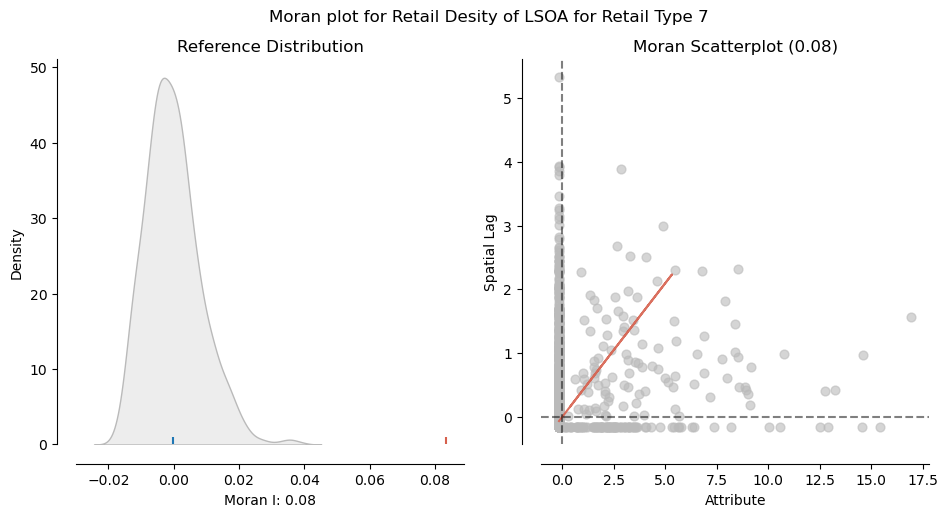

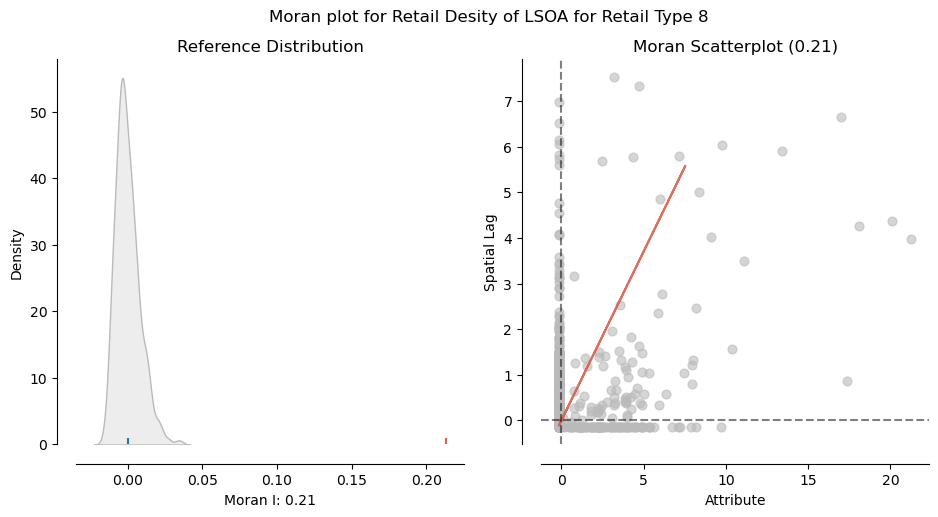

In [10]:
centroids = df_map.geometry.centroid
#ax.text(centroids.x,centroids.y,s = df_map['NAME'])
# for i,p in enumerate(centroids):
#     ax.text(p.x,p.y,s = df_map.loc[i,'NAME'],fontsize=5,color='k',zorder=13,
#             horizontalalignment='center')

labels = ['all','1','2','3','4','5','6','7','8']
nT = int(scattergdf['class'].max())

Moran_I_Type_list = []
Moran_I_list = []
random_Z_list = []
random_Zp_list = []
norm_Z_list = []
norm_Zp_list = []
# Calculating the spatially autocorrelated Moran index
for i in range(0,nT+1):

    # draw 8 types of retail shops 
    if i==0:
        data = scattergdf
    else:
        data = scattergdf[scattergdf['class']==i]
        
    temp = data['LSOA'].value_counts()
    temp = pd.DataFrame(temp)
    temp.rename(columns={'LSOA':'Retail_count'},inplace=True)
    temp['LSOA'] = temp.index
    df_map2 = pd.merge(df_map,temp,left_on='LSOA11CD', right_on = 'LSOA',
                              how='left')
    df_map2 = df_map2.fillna(value={'Retail_count':0})
    df_map2['Retail_Density']  = df_map2['Retail_count']/df_map2.area
    df_map2['geometry'] = centroids
    
    wr = lps.weights.Rook.from_dataframe(df_map2)
    y=df_map2['Retail_Density']
    moran = Moran(y,wr)
    moran.I
    
    Moran_I_list.append(moran.I)
    random_Z_list.append(moran.z_rand)
    random_Zp_list.append(moran.p_rand)
    norm_Z_list.append(moran.z_norm)
    norm_Zp_list.append(moran.p_norm)  
    
    lisa = esda.moran.Moran_Local(y,wr)
    lisa.Is
    lisa.q
    
    fig, ax = plot_moran(moran, zstandard=True, figsize=(11,5),aspect_equal=False)
    plt.suptitle(f'Moran plot for Retail Desity of LSOA for Retail Type {labels[i]}')
    path_out = '../result/plot/'
    filename = f'{year}_Local_Moran_Retail_{labels[i]}'
    plt.savefig(path_out+filename+'.png',
                dpi=500,bbox_inches = 'tight')

In [11]:
Moran_I_df = pd.DataFrame()
Moran_I_df['Retail'], Moran_I_df['Moran_I'], Moran_I_df['random_Z'], Moran_I_df['random_p'], Moran_I_df['norm_Z'], Moran_I_df['norm_p'] = \
    (labels,Moran_I_list, random_Z_list, random_Zp_list, norm_Z_list, norm_Zp_list)
Moran_I_df.to_csv(f'../result/data/{year}_MoranI.csv',index=False)

In [12]:
# Calculating the bivariate Moran index
for i in range(0,nT+1):

    # draw 8 types of retail shops 
    if i==0:
        data = scattergdf
    else:
        data = scattergdf[scattergdf['class']==i]
        
    temp = data['LSOA'].value_counts()
    temp = pd.DataFrame(temp)
    temp.rename(columns={'LSOA':f'Retail_count_Type_{labels[i]}'},inplace=True)
    temp['LSOA'] = temp.index
    df_map = pd.merge(df_map,temp,left_on='LSOA11CD', right_on = 'LSOA',
                              how='left')
    df_map = df_map.drop(labels='LSOA',axis=1)
    df_map = df_map.fillna(value={f'Retail_count_Type_{labels[i]}':0})
    df_map[f'Retail_Density_Type_{labels[i]}']  = df_map[f'Retail_count_Type_{labels[i]}']/df_map.area
    
df_map['Areas'] = df_map.area
df_map['geometry'] = centroids
df_map.to_file(f'../result/data/{year}_LSOA_Retail_Density_map.shp',
            driver='ESRI Shapefile',
            encoding='utf-8')

/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


In [13]:
Moran_I_list2 = np.zeros((nT+1,nT+1))
random_Z_list2 = np.zeros((nT+1,nT+1))
random_Zp_list2 = np.zeros((nT+1,nT+1))

for i in range(0,nT):
    for j in range(i+1,nT+1):
        x = df_map[f'Retail_Density_Type_{labels[i]}']
        y = df_map[f'Retail_Density_Type_{labels[j]}']
        wr = lps.weights.Rook.from_dataframe(df_map)

        moran = Moran_BV(x,y,wr)
        #moran.I
            
        Moran_I_list2[i,j] = moran.I
        random_Z_list2[i,j] = moran.z_sim
        random_Zp_list2[i,j] = moran.p_sim
        
        # fig, ax = plot_moran_bv_simulation(moran,  figsize=(10,10),aspect_equal=False)
        # plt.title(f'Moran plot for Retail Desity of LSOA for Retail Type {labels[i]} & {labels[j]}')
        # path_out = '../result/plot/'
        # filename = f'Local_Moran_Retail_{labels[i]}_{labels[j]}'
        # plt.savefig(path_out+filename+'.png',
        #             dpi=500,bbox_inches = 'tight')

data = {f'MoranI_{labels[i]}' : list(Moran_I_list2[:,i]) for i in range(nT+1)
        }

Moran_I_df2 = pd.DataFrame(data,index=labels)
Moran_I_df2.loc[nT+1] = Moran_I_list
Moran_I_df2.to_csv(f'../result/data/{year}_MoranI_BV.csv',index=True)

data = {f'simZ_{labels[i]}' : list(random_Z_list2[:,i]) for i in range(nT+1)
        }
Moran_I_df2 = pd.DataFrame(data,index=labels)
Moran_I_df2.to_csv(f'../result/data/{year}_MoranI_BV_simZ.csv',index=True)

data = {f'simp_{labels[i]}' : list(random_Zp_list2[:,i]) for i in range(nT+1)
        }
Moran_I_df2 = pd.DataFrame(data,index=labels)
Moran_I_df2.to_csv(f'../result/data/{year}_MoranI_BV_simZp.csv',index=True)

/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/libpysal/weights/util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])
/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/libpysal/weights/util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])
/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/libpysal/weights/util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])
/Users/xiuyu/opt/anaconda3/envs/tianyi/l

/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/libpysal/weights/util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])
/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/libpysal/weights/util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])
/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/libpysal/weights/util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])
/Users/xiuyu/opt/anaconda3/envs/tianyi/l